#Proyecto-ANALISIS DE DATOS, CON PYTHON, PANDAS Y SEABORNS

In [2]:
import pandas as pd

df = pd.read_csv('Customer-Churn-Records.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [5]:
print('Columanas del dataset:',df.columns)
print('Tamaño del dataset:', df.shape)

Columanas del dataset: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')
Tamaño del dataset: (10000, 18)


In [6]:
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [7]:
print(df.dtypes)


RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [8]:
df.duplicated().sum()


0

In [9]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [10]:
#clasificar clientes segun su puntaje crediticio
#mientras mas alto mejor historial de pago
''' 
Cliente Objetivo 1
Excelente 2
Muy bueno/Bueno 3
Regular 4
Malo 5
'''

def clasificacion(score):
    if score<579:
        return 5
    elif score>=580 and score<=669:
        return 4
    elif score>=670 and score<=739:
        return 3
    elif score>=740 and score<=799:
        return 2
    else: 
        return 1


In [11]:
df['ClientClassified']= df['CreditScore'].apply(clasificacion)

In [12]:
df[['CreditScore', 'ClientClassified']].head(15)


,CreditScore,ClientClassified
0,619,4
1,608,4
2,502,5
3,699,3
4,850,1
5,645,4
6,822,1
7,376,5
8,501,5
9,684,3


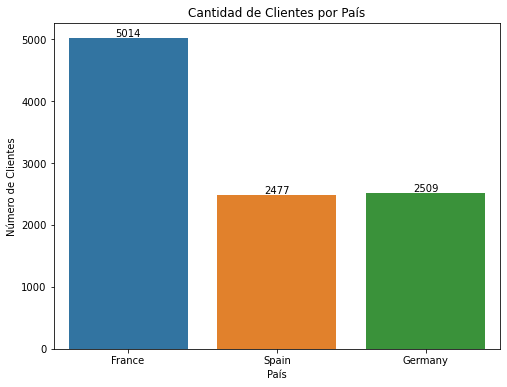

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography')
plt.title("Cantidad de Clientes por País")
plt.xlabel("País")
plt.ylabel("Número de Clientes")

#agregar cantidad arriba de las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.show()

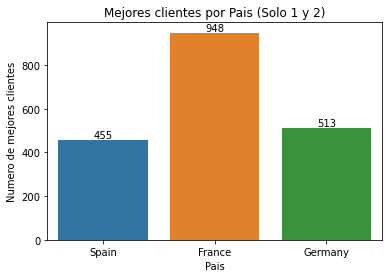

In [ ]:
mejores= df[df['ClientClassified']<=2]
sns.countplot(data=mejores, x='Geography')
plt.title("Mejores clientes por Pais (Solo 1 y 2)") #puntaje crediticio
plt.xlabel('Pais')
plt.ylabel('Numero de mejores clientes')

#agregar cantidad arriba de las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.show()

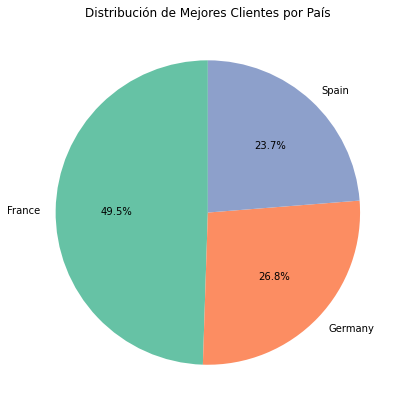

In [23]:
#muestra en porcentajes los paises que tienen mejores clientes 
#en base a su puntaje crediticio

mejores = df[df['ClientClassified'] <= 2]
conteo = mejores['Geography'].value_counts()

# Definir colores personalizados
colores_personalizados = sns.color_palette("Set2") 

#pastel
plt.figure(figsize=(7,7))
plt.pie(
    conteo,
    labels=conteo.index,
    autopct='%1.1f%%',   # muestra porcentaje bonito
    startangle=90,        # posición inicial
    colors=colores_personalizados
)

plt.title("Distribución de Mejores Clientes por País")
plt.show()


In [164]:
#grafico de satisfacción del cliente
# 1 = satisfecho
# 0 = no satisfecho

def satisfecho(score): 
    
    if score>=4:
        return 1
    else: 
        return 0
        

In [165]:
df['ClientSatisfied']= df['Satisfaction Score'].apply(satisfecho)

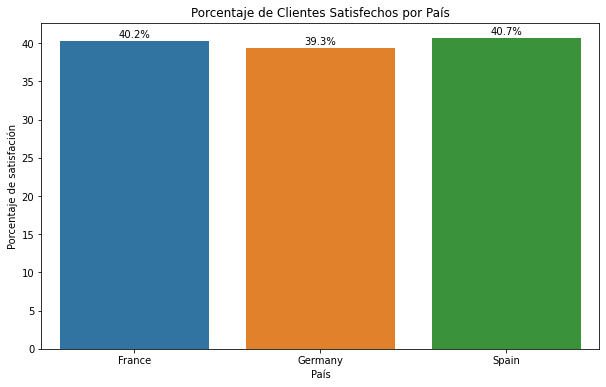

In [ ]:
# calculamos promedio por pais
satisfaccion_por_pais = df.groupby('Geography')['ClientSatisfied'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaccion_por_pais.index, y=satisfaccion_por_pais.values)
plt.title("Porcentaje de Clientes Satisfechos por País")
plt.ylabel("Porcentaje de satisfación")
plt.xlabel("País")
for i, v in enumerate(satisfaccion_por_pais.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')
    #i=posicion , v=porcentaje,  v:.1% formato de percent, v + 0.5posicion
plt.show()

In [ ]:
df['Satisfaction Score'].max()

5

In [ ]:
# Promedio de edad por país
df.groupby('Geography')['Age'].mean()

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64

In [ ]:

# Total de clientes por país  
df.groupby('Geography')['CustomerId'].count()


Geography
France     5014
Germany    2509
Spain      2477
Name: CustomerId, dtype: int64

In [ ]:
# Máximo balance por país
df.groupby('Geography')['Balance'].max()

Geography
France     238387.56
Germany    214346.96
Spain      250898.09
Name: Balance, dtype: float64

In [ ]:
#cantidad de tarjetas de creditos por pais
df[df['HasCrCard'] == 1].groupby('Geography')['HasCrCard'].count()

Geography
France     3543
Germany    1791
Spain      1721
Name: HasCrCard, dtype: int64

In [ ]:
#clientes activos en el banco por pais
df[df['IsActiveMember'] == 1].groupby('Geography')['IsActiveMember'].count()

Geography
France     2591
Germany    1248
Spain      1312
Name: IsActiveMember, dtype: int64

In [ ]:
#clientes que han dejado el banco por pais
df[df['Exited'] == 1].groupby('Geography')['Exited'].count()

Geography
France     811
Germany    814
Spain      413
Name: Exited, dtype: int64

In [ ]:
# satisfaccion por genero
satisfaccion_genero = df.groupby('Gender')['ClientSatisfied'].mean() * 100
print("Satisfacción por género:")
print(satisfaccion_genero)

Satisfacción por género:
Gender
Female    40.303764
Male      39.967015
Name: ClientSatisfied, dtype: float64


In [ ]:
# distrubicion por genero en los paises
distribucion = df.groupby(['Geography', 'Gender']).size().groupby(level=0).apply(
    lambda x: x / x.sum() * 100
).unstack()

print("DISTRIBUCIÓN POR GÉNERO (%)")
print(distribucion)

DISTRIBUCIÓN POR GÉNERO (%)
Gender        Female       Male
Geography                      
France     45.093738  54.906262
Germany    47.548824  52.451176
Spain      43.964473  56.035527


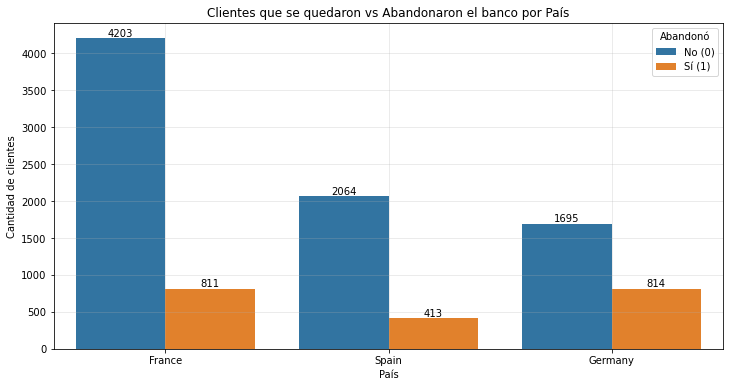

In [ ]:
#Analisis Central: ¿En que pais hay mas baja de clientes en el banco?
# ahora pasaremos a ver por que?

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title("Clientes que se quedaron vs Abandonaron el banco por País")
plt.xlabel("País")
plt.ylabel("Cantidad de clientes")
plt.grid(True, alpha=0.3)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')
    
plt.legend(title='Abandonó', labels=['No (0)', 'Sí (1)'])
plt.show()

#Analisis
Gracias al analisis de nuestros datos, nos hemos dado cuenta que en Alemania/Germany, existe un problema de descenso, algo esta pasando que los usuarios estan decidiendo irse del banco ¿Cómo llegamos a estas conclusiones?

En analisis anteriores pudimos ver que el total de clientes en *GERMANY/ALEMANIA era de 2509* y en nuestro grafico llamado

#*Clientes que abandonaron vs se quedaron en el banco por pais*

podemos ver que de ese total de clientes en GERMANY (*2509*), 1695 se quedaron, estan estables. Pero *814 se fueron* lo cual lo hace una preocupación a comparación de los otros paises, (Francia y España)

##EN base a esto, pasare a hacer un analisis basado en alemania, buscando entender porque este abandono que tiene una tasa del 32.4%. 

"¿Qué está pasando en el mercado alemán que hace que 1 de cada 3 clientes decida irse?"

In [ ]:
# Filtrar solo clientes de Alemania
alemania = df[df['Geography'] == 'Germany']

print("ANÁLISIS PROFUNDO: ¿POR QUÉ SE VAN LOS CLIENTES EN ALEMANIA?")
print(f"Total clientes Alemania: {len(alemania)}")
print(f"Clientes que se quedaron: {len(alemania[alemania['Exited'] == 0])}")
print(f"Clientes que se fueron: {len(alemania[alemania['Exited'] == 1])}")
print(f"Tasa de abandono: {(len(alemania[alemania['Exited'] == 1]) / len(alemania) * 100):.1f}%")

 ANÁLISIS PROFUNDO: ¿POR QUÉ SE VAN LOS CLIENTES EN ALEMANIA?
Total clientes Alemania: 2509
Clientes que se quedaron: 1695
Clientes que se fueron: 814
Tasa de abandono: 32.4%


Cantidad de clientes satisfechos en Germany/Alemania: Geography
Germany    987
dtype: int64
Cantidad de clientes no satisfechos en Germany/Alemania: Geography
Germany    1522
dtype: int64


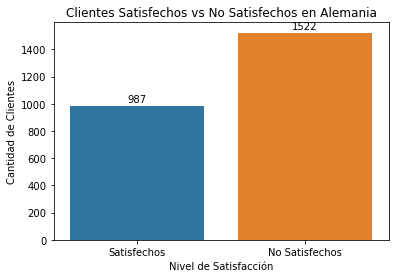

In [ ]:
#clientes sastisfechos en germany vs no satisfecho

satisfecho=df[(df['Geography'] == 'Germany') & (df['ClientSatisfied'] == 1)].groupby('Geography').size()

#clientes sastisfechos en germany vs no satisfecho

nosatifecho=df[(df['Geography'] == 'Germany') & (df['ClientSatisfied'] == 0)].groupby('Geography').size()

print('Cantidad de clientes satisfechos en Germany/Alemania:', satisfecho)
print('Cantidad de clientes no satisfechos en Germany/Alemania:', nosatifecho)


# Crear arrays para el gráfico
categorias = ['Satisfechos', 'No Satisfechos']
valores = [satisfecho.iloc[0], nosatifecho.iloc[0]]

sns.barplot(x=categorias, y=valores)
plt.title("Clientes Satisfechos vs No Satisfechos en Alemania")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Nivel de Satisfacción")

# Agregar números en las barras
for i, v in enumerate(valores):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

*Teoría hipotetica*: ¿Los clientes se estan yendo del banco porque no tienen dinero?

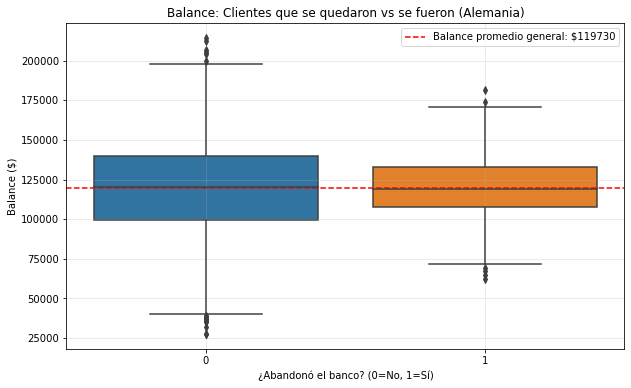

ANÁLISIS DE BALANCE EN ALEMANIA:
Clientes que se QUEDARON:
• Balance promedio: $119427.11
• Balance mediano: $120252.02

Clientes que se FUERON:
• Balance promedio: $120361.08
• Balance mediano: $118951.22


In [ ]:
#balance de los cleintes que se fueron (dinero que tienen en cuentas)

# Filtrar clientes de Alemania
alemania = df[df['Geography'] == 'Germany']

plt.figure(figsize=(10, 6))
sns.boxplot(data=alemania, x='Exited', y='Balance')
plt.title("Balance: Clientes que se quedaron vs se fueron (Alemania)")
plt.xlabel("¿Abandonó el banco? (0=No, 1=Sí)")
plt.ylabel("Balance ($)")
plt.grid(True, alpha=0.3)

# Agregar línea de promedio general para referencia
promedio_general = alemania['Balance'].mean()
plt.axhline(promedio_general, color='red', linestyle='--', 
           label=f'Balance promedio general: ${promedio_general:.0f}')

plt.legend()
plt.show()


# Estadísticas
print("ANÁLISIS DE BALANCE EN ALEMANIA:")
print("=" * 40)
print("Clientes que se QUEDARON:")
print(f"• Balance promedio: ${alemania[alemania['Exited'] == 0]['Balance'].mean():.2f}")
print(f"• Balance mediano: ${alemania[alemania['Exited'] == 0]['Balance'].median():.2f}")

print("\nClientes que se FUERON:")
print(f"• Balance promedio: ${alemania[alemania['Exited'] == 1]['Balance'].mean():.2f}")
print(f"• Balance mediano: ${alemania[alemania['Exited'] == 1]['Balance'].median():.2f}")

*Se rechaza teoria inicial* 
ESTO NOS DICE QUE ESTAMOS PERDIENDO CLIENTES VALIOSOS,clientes con buenos balances ¿POR QUÉ? POSIBLES CAUSAS:

-Mala atención a clientes premium

-Competencia que ofrece mejores condiciones a clientes con alto balance

-Falta de productos adecuados para clientes con más dinero

-Problemas con tarjetas GOLD o servicios exclusivos



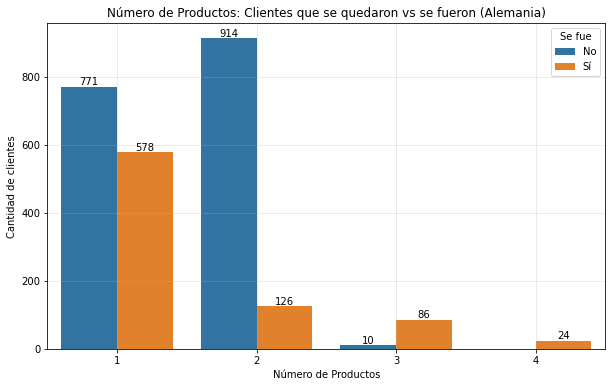


 ANÁLISIS DE PRODUCTOS EN ALEMANIA:
Productos - Clientes que se QUEDARON:
 1 producto(s): 771 clientes
 2 producto(s): 914 clientes
 3 producto(s): 10 clientes

Productos - Clientes que se FUERON:
1 producto(s): 578 clientes
2 producto(s): 126 clientes
3 producto(s): 86 clientes
4 producto(s): 24 clientes


In [ ]:
# Análisis de productos
# Filtrar clientes de Alemania
alemania = df[df['Geography'] == 'Germany']

plt.figure(figsize=(10, 6))
sns.countplot(data=alemania, x='NumOfProducts', hue='Exited')
plt.title("Número de Productos: Clientes que se quedaron vs se fueron (Alemania)")
plt.xlabel("Número de Productos")
plt.ylabel("Cantidad de clientes")

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')
    
plt.legend(title='Se fue', labels=['No', 'Sí'])
plt.grid(True, alpha=0.3)
plt.show()

# Estadísticas de productos
print("\n ANÁLISIS DE PRODUCTOS EN ALEMANIA:")
print("=" * 40)
productos_quedaron = alemania[alemania['Exited'] == 0]['NumOfProducts'].value_counts().sort_index()
productos_fueron = alemania[alemania['Exited'] == 1]['NumOfProducts'].value_counts().sort_index()

print("Productos - Clientes que se QUEDARON:")
for productos, cantidad in productos_quedaron.items():
    print(f" {productos} producto(s): {cantidad} clientes")

print("\nProductos - Clientes que se FUERON:")
for productos, cantidad in productos_fueron.items():
    print(f"{productos} producto(s): {cantidad} clientes")

este insight sugiere que el banco pudiese tener problemas manipulando multiples productos y que los clientes prefieren irse

pero habre paso a la siguiente pregunta: *Los clientes que se fueron estaban activos o inactivos?*

 ANÁLISIS DE CLIENTES ACTIVOS/INACTIVOS EN ALEMANIA
Tabla de Actividad - Actividad vs Abandono:
IsActiveMember    0    1
Exited                  
0               743  952
1               518  296

Clientes que se QUEDARON (Exited = 0):
-Activos: 952 clientes (56.2%)
-Inactivos: 743 clientes (43.8%)

Clientes que se FUERON (Exited = 1):
-Activos: 296 clientes (36.4%)
-Inactivos: 518 clientes (63.6%)


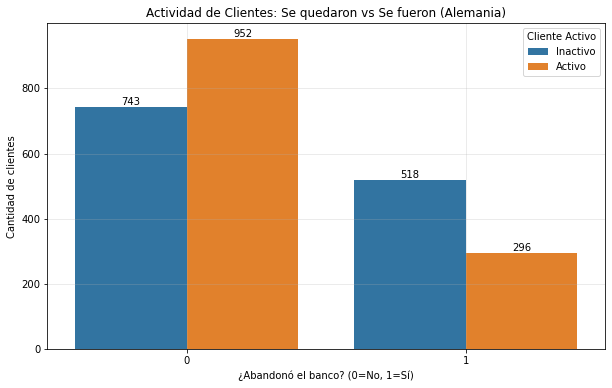

In [ ]:
#analisis
print(" ANÁLISIS DE CLIENTES ACTIVOS/INACTIVOS EN ALEMANIA")
print("=" * 50)

#filtrar Alemania
alemania = df[df['Geography'] == 'Germany']

#analisis de actividad-  ver relacion entre dos tablas
tabla_actividad = pd.crosstab(alemania['Exited'], alemania['IsActiveMember'])
print("Tabla de Actividad - Actividad vs Abandono:")
print(tabla_actividad)
print()

#porcentaje por grupo
print("Clientes que se QUEDARON (Exited = 0):")
quedaron = alemania[alemania['Exited'] == 0]
activos_quedaron = quedaron[quedaron['IsActiveMember'] == 1]
inactivos_quedaron = quedaron[quedaron['IsActiveMember'] == 0]

print(f"-Activos: {len(activos_quedaron)} clientes ({(len(activos_quedaron)/len(quedaron)*100):.1f}%)")
print(f"-Inactivos: {len(inactivos_quedaron)} clientes ({(len(inactivos_quedaron)/len(quedaron)*100):.1f}%)")

#Se repite
print("\nClientes que se FUERON (Exited = 1):")
fueron = alemania[alemania['Exited'] == 1]
activos_fueron = fueron[fueron['IsActiveMember'] == 1]
inactivos_fueron = fueron[fueron['IsActiveMember'] == 0]

print(f"-Activos: {len(activos_fueron)} clientes ({(len(activos_fueron)/len(fueron)*100):.1f}%)")
print(f"-Inactivos: {len(inactivos_fueron)} clientes ({(len(inactivos_fueron)/len(fueron)*100):.1f}%)")

#graf
plt.figure(figsize=(10, 6))
sns.countplot(data=alemania, x='Exited', hue='IsActiveMember')
plt.title("Actividad de Clientes: Se quedaron vs Se fueron (Alemania)")
plt.xlabel("¿Abandonó el banco? (0=No, 1=Sí)")
plt.ylabel("Cantidad de clientes")

# Agregar números en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.legend(title='Cliente Activo', labels=['Inactivo', 'Activo'])
plt.grid(True, alpha=0.3)
plt.show()

se entiende que los clientes que se fueron no eran activos, entonces hay que proponer estrategias para que se vuelvan activos con sus cuentas y no continuen abandonando el banco , ya que aun se sigue reflejando un gran porcentaje de clientes inactivos en el banco

se proponen
- Alertas temprans e inactividad
-Progrmaas de fidelización personalizados
-ofertas segun perfil
-comunicación para re-enganchar al cliente

retener clientes inactivos es mas efectivo que adquirir nuevos , ya que conocemos a nuestro clientes, el adquirir nuevos (generaria gastos para el banco, publicidad/promociones/comisiones)

In [175]:

#filtrar Alemania
alemania = df[df['Geography'] == 'Germany']

# Analizar características de los inactivos que se fueron y que no estaban activos
inactivos_se_fueron = alemania[(alemania['IsActiveMember'] == 0) & 
                               (alemania['Exited'] == 1)]

print("PERFIL DE INACTIVOS QUE SE FUERON:")
print(f"-Edad promedio: {inactivos_se_fueron['Age'].mean():.1f} años")
print(f"-Saldo promedio: ${inactivos_se_fueron['Balance'].mean():.0f}")
print(f"-Productos promedio: {inactivos_se_fueron['NumOfProducts'].mean():.1f}")
print(f"-Satisfacción promedio: {inactivos_se_fueron['Satisfaction Score'].mean():.1f}/5")

PERFIL DE INACTIVOS QUE SE FUERON:
-Edad promedio: 44.9 años
-Saldo promedio: $120209
-Productos promedio: 1.4
-Satisfacción promedio: 3.0/5


Concluimos que los clientes que se estan yendo aparte de no tener cuentas activas, estan insatisfechos con el banco.(Posible mala atención o productos no adecuados segun necesidades)
pero los clientes que se estan yendo son clientes valiosos. 
La mayoria de los clientes que se van, SOLO TIENEN 1 PRODUCTOS, o sea no estamos logrando expandirnos 

Debemos mejorar nuestras estrategias para clientes de mediana edad con buen potencial economico. 

terminologias: 
-cross-selling: ofrecer productos adicionales al cliente
-up-selling: Mejorar o actualizar productos actuales 

*Estrategias*: 
1. Programacion de reactivación 
2. mejorar experiencia para aumentar nivel de satisfacción
3. Cross-selling agresivo para clientes que soo tengan 1 producto
4. Comunicación personalizada para clientes de 40 a 50 años, capacitar personal

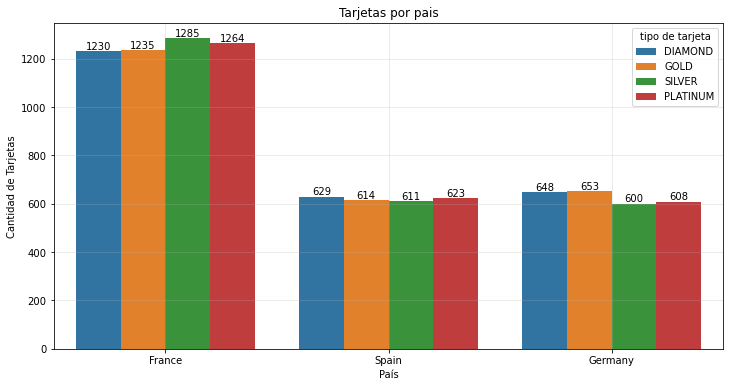

In [166]:
#Cantidad de tarjetas Gold,Silver, Platinum, Diamond, etc por pais

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Geography', hue='Card Type')
plt.title("Tarjetas por pais")
plt.xlabel("País")
plt.ylabel("Cantidad de Tarjetas")
plt.grid(True, alpha=0.3)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')
    
plt.legend(title='tipo de tarjeta')
plt.show()

Gracias a este grafico podemos entender que en francia la tarjeta más utilizada es la Silver. 

en España la Diamond vendria siendo la más utilizada, En alemania vendria siendo la Gold

In [168]:
# Múltiples métricas por país
resumen_paises = df.groupby('Geography').agg({
    'ClientSatisfied': 'mean',
    'Exited': 'mean', 
    'IsActiveMember': 'mean',
    'Balance': 'median',
    'Age': 'median'
})
print(resumen_paises)

           ClientSatisfied    Exited  IsActiveMember    Balance   Age
Geography                                                            
France            0.402473  0.161747        0.516753   62153.50  37.0
Germany           0.393384  0.324432        0.497409  119703.10  38.0
Spain             0.406540  0.166734        0.529673   61710.44  37.0
